# Matching track

Sometimes, when you have many real-data trajectories, you want to detect the return trips. This tutorial is going to show how to split and reverse one half of it in order to keep the same directions for all the trajectories. The algorithm is based on the comparison of trajectories: the return point corresponds to the point which divides the trace in two and whose distance between the two is the smallest. In tracklib, the function to do this is:
<br/>
<div class="alert alert-block alert-info" style="padding:1em">
    
```python
  collection = tkl.XXXX
```

</div>

## As usual, let's start by defining our environment

The first task is only useful for the online notebook and import the local tracklib code source. It's not necessary if tracklib is installed from PyPI.

In [1]:
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The following two imports are necessary for the tutorial:

In [2]:
# Matplotlib to create visualizations
import matplotlib.pyplot as plt

# Import tracklib library
import tracklib as tkl

## Loading a collection of tracks

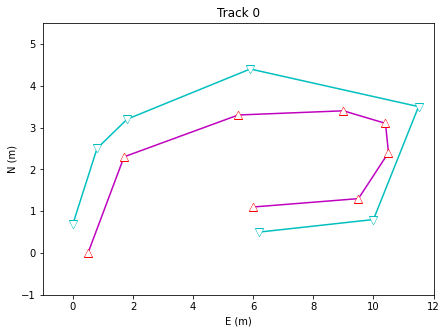

In [3]:
tkl.ObsTime.setReadFormat("4Y-2M-2D 2h:2m:2s")

plt.figure(figsize=(7, 5))

chemin1 = '../../../../test/data/compare/dtw1.csv'
trace1 = tkl.TrackReader.readFromCsv(chemin1, 0, 1, 2, 3, separator=",",read_all=True, h=1)
trace1gr = trace1.copy()
trace1gr.plot('m-')
trace1.plotAsMarkers(type=tkl.MARKERS_TYPE_WARNING)

chemin2 = '../../../../test/data/compare/dtw2.csv'
trace2 = tkl.TrackReader.readFromCsv(chemin2, 0, 1, 2, 3, separator=",",read_all=True, h=1)
trace2.plot('c-')
trace2.plotAsMarkers(bkg='w', frg='c', sym_frg = " ", sym_bkg = "v")

plt.xlim([-1, 12])
plt.ylim([-1, 5.5])
plt.show()

### Profile of difference between two traces

with DTW (Dynamic Time Warping) method

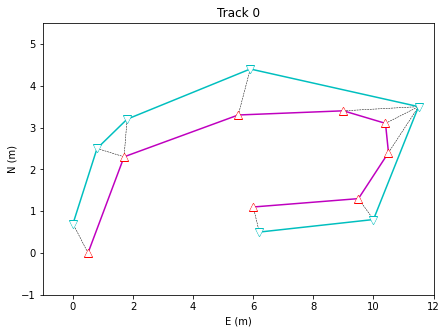

In [4]:
plt.figure(figsize=(7, 5))

mode = tkl.MODE_MATCHING_DTW
p = 2
dim = 2

profile = tkl.match(trace1, trace2, mode=mode, p=p, dim=dim, verbose=False, plot=False)
tkl.plotMatching(profile, trace2, append=True)

trace1gr.plot('m-')
trace1.plotAsMarkers(type=tkl.MARKERS_TYPE_WARNING)
trace2.plot('c-')
trace2.plotAsMarkers(bkg='w', frg='c', sym_frg = " ", sym_bkg = "v")

plt.xlim([-1, 12])
plt.ylim([-1, 5.5])
plt.show()